In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [ ]:
from glob import glob


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from itertools import cycle


In [ ]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [ ]:
from IPython.display import Audio, display

# Path to the audio file
audio_file = '/content/[iSongs.info] 01 - Hanuman Chalisa.mp3'

# Display the audio player with specific parameters
display(Audio(audio_file, rate=44100, autoplay=False))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import librosa

# Path to the audio file
audio_file_path = '/content/[iSongs.info] 01 - Hanuman Chalisa.mp3'

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Print some information about the loaded audio
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-9.6656549e-09 -1.6014707e-07 -1.5422279e-07  7.2750026e-08
 -8.5051624e-08 -4.3921432e-08  1.6787590e-07  1.5609328e-07
 -5.9680588e-08  7.4915079e-09]
shape y: (5476262,)
sr: 22050


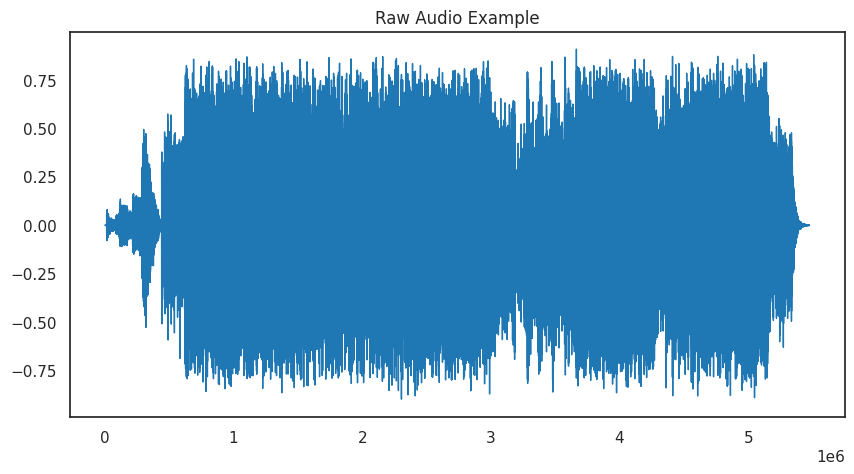

In [ ]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

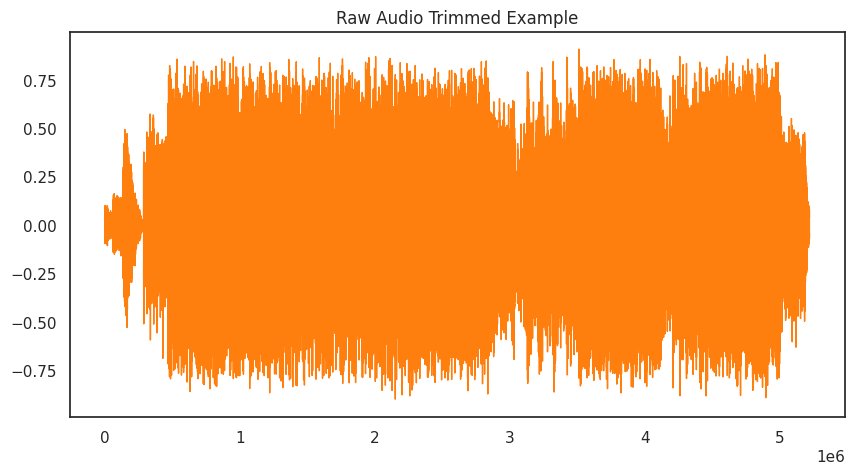

In [ ]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

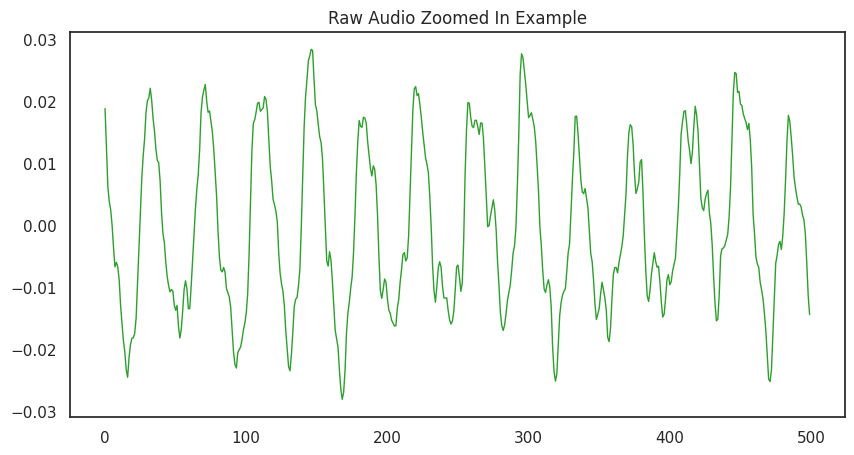

In [ ]:
pd.Series(y[50000:50500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 10696)

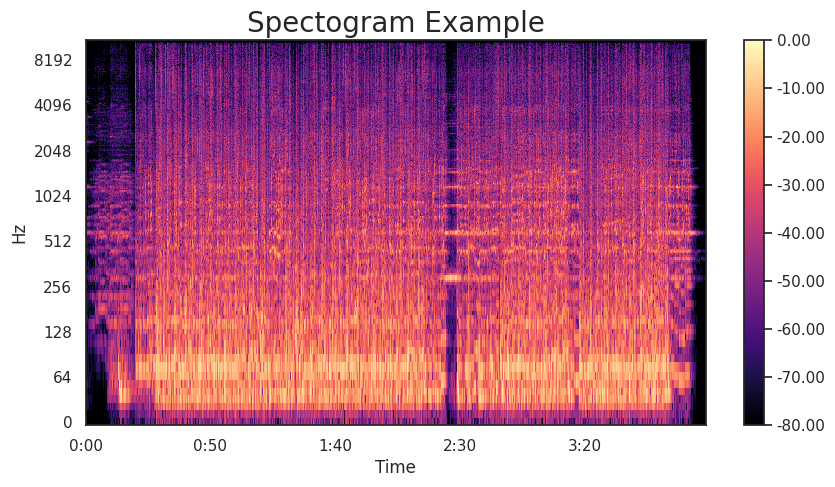

In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment


In [ ]:
!apt-get -y install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
input_file = "/content/[iSongs.info] 01 - Hanuman Chalisa.mp3"
audio = AudioSegment.from_mp3(input_file)

In [ ]:
# To dowload the compressed audio file
from google.colab import files

output_file = "compressed_audio.mp3"

# Bitrate for compression
bitrate = "64k"

# Apply MP3 compression
compressed_audio = audio.export(output_file, format="mp3", bitrate=bitrate)
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

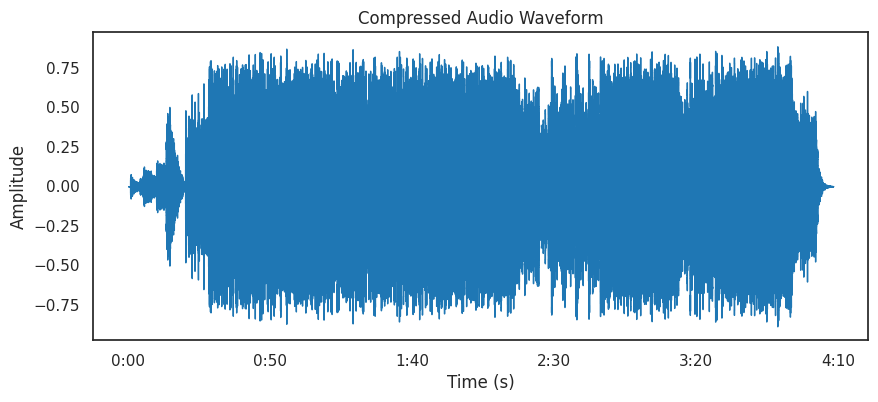

In [ ]:
# Load the compressed audio file
y_compressed, sr_compressed = librosa.load(output_file)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_compressed, sr=sr_compressed)
plt.title('Compressed Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


###Here we can compare the output of compressed audio wave form with original wave form